In [1]:
from __future__ import unicode_literals
import numpy as np
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']
import matplotlib.pyplot as plt
from sympy import *
from IPython.core.interactiveshell import InteractiveShell #print all elements, not only last one
InteractiveShell.ast_node_interactivity = "all"
init_printing(use_unicode=True)

%matplotlib inline

/tmp/ipykernel_2156/4107177530.py:5: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  matplotlib.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']


# Définition de la fonction et des variables</span>



In [2]:
q, b, S, h, w, B, h0 = symbols('q, b, S, h, w, bbar, h0') # p : probabilité d'arrestation et de condamnation, b : bénéfice monétaire après avoir accompli le crime, S : sanction ou amende, h : préjudice, w : richesse de la victime
EU1 = symbols('EU1', cls=Function)(q,b,S) # utilité attendue pour le délinquant
EU2 = symbols ('EU2', cls=Function)(q,h,w) # utilité attendue pour la victime
f = symbols ('f', cls = Function)(b) # fonction de densité de b
C = symbols ('C', cls = Function)(q) # coût d'appréhension et de sanction
dF = symbols ('dF', cls = Function)(b) # fonction de répartition
b0 = symbols ('b0', cls = Function)(q,S) # monetary benefit expected

EU1
EU2
f
C

In [3]:
def EU1(q, b=b, S=S):
    return (1-q)*b + q*(b-S)

def EU2(q, w=w, h =h):
    return (1-q)*(w -h) + q*w

def b_expected(S=S, q=q) :
    return q*S

# Coût marginal d'appréhension et de sanction

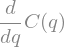

In [4]:
# coût marginal d'appréhension et de sanction
c_m = C.diff(q)
c_m

In [5]:
q_m = EU1(q, b, S).diff(q) # pour voir l'effet d'une variation de q sur l'utilité espérée du délinquant
s_m = EU1(q, b, S).diff(S) # pour voir l'effet d'une variation de s sur l'utilité espérée du délinquant
b_m = EU1(q, b, S).diff(b) # pour voir l'effet d'une variation de b sur l'utilité espérée du délinquant
q_m
s_m
b_m

In [6]:
q_vic = EU2(q, w, h).diff(q) # pour voir l'effet d'une variation de q sur l'utilité espérée de la victime
h_m = EU2(q, w, h).diff(h) # pour voir l'effet d'une variation de h sur l'utilité espérée de la victime
w_m = EU2(q, w, h).diff(w) # pour voir l'effet d'une variation de q sur l'utilité espérée de la victime
q_vic
h_m
w_m

# Bénéfice attendu si le délinquant est un individu neutre au risque



In [7]:
EU1 = (1-q)*b + q*(b-S)
eq1 = Eq(simplify(EU1), 0)
eq1
b_expect = solve(eq1,b)[0]
eq2 = Eq(b, b_expect)
eq2

# Bien être social

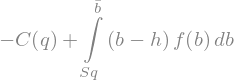

/usr/local/lib/python3.8/dist-packages/sympy/core/relational.py:486: SymPyDeprecationWarning: 

Eq(expr) with rhs default to 0 has been deprecated since SymPy 1.5.
Use Eq(expr, 0) instead. See
https://github.com/sympy/sympy/issues/16587 for more info.

  SymPyDeprecationWarning(


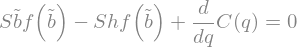

/usr/local/lib/python3.8/dist-packages/sympy/core/relational.py:486: SymPyDeprecationWarning: 

Eq(expr) with rhs default to 0 has been deprecated since SymPy 1.5.
Use Eq(expr, 0) instead. See
https://github.com/sympy/sympy/issues/16587 for more info.

  SymPyDeprecationWarning(


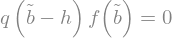

In [8]:
# bien être social
b0 = q*S
funct = (b-h)*f # fonction de bien être social
welfare = integrate(funct, (b, (b0, B))) - C
welfare


derive_q = Eq(welfare.diff(q)) # dérivée du bien être social par rapport à q
q_star = solve(derive_q, 0) [0]

equa_q = Eq(factor(q_star),0)
equa_q.subs(q*S,'btilde')

derive_s = Eq(welfare.diff(S)) # dérviée du bien être social par rapport à S
S_star = solve(derive_s, 0) [0]
S_star
equa_S = Eq(factor(S_star),0)
equa_S.subs(q*S,'btilde')

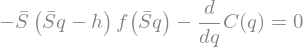

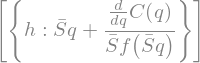

In [9]:
# optimum

q0 = symbols ('qbar', real = True)
S0 = symbols ('Sbar', real = True)

derive_q.subs(S, S0)
solve(derive_q.subs(S, S0))

equa_S = Eq(S_star.subs(q,q0),0)
equa_S

S_opt = equa_S.subs(q, q0)
solve(S_opt)

# Exemple d'application

Text(0, 0.5, 'Welfare')

Text(0.5, 0, 'p')

Text(0, 0.5, 'S')

Text(0.5, 1.0, 'Welfare as a Function of p and S')

<function matplotlib.pyplot.show(close=None, block=None)>

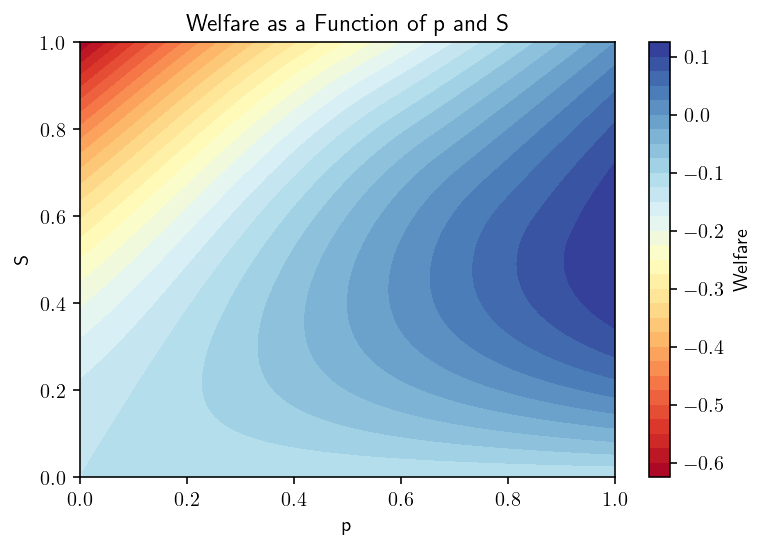

In [10]:
f = Piecewise((1, And(b >= 0, b <= 1)), (0, True))

# Define other parameters
h = 1
w = 1
B = 2
C = q**2
h0 = 0.5

# Define welfare function
b0 = q*S
funct = (b-h)*f
welfare = integrate(funct, (b, (b0, B))) - C

# Define a function to evaluate welfare given p and S
welfare_func = lambdify((q, S), welfare.subs(h, h0).subs(w, 1).subs(B, 2).subs(C, q**2).subs(b0, q*S))

# Evaluate welfare for different values of p and S
p_values = np.linspace(0, 1, 101)
S_values = np.linspace(0, 1, 101)
welfare_values = np.zeros((len(p_values), len(S_values)))
for i, p in enumerate(p_values):
    for j, S in enumerate(S_values):
        welfare_values[i, j] = welfare_func(p, S)

# Plot the welfare function for different values of p and S
fig, ax = plt.subplots()
CS = ax.contourf(p_values, S_values, welfare_values, levels=30, cmap='RdYlBu')
cbar = fig.colorbar(CS)
cbar.ax.set_ylabel('Welfare')
ax.set_xlabel('p')
ax.set_ylabel('S')
ax.set_title('Welfare as a Function of p and S')
plt.show

## fonction de densité uniforme et coût quadratique

/usr/local/lib/python3.8/dist-packages/sympy/core/relational.py:486: SymPyDeprecationWarning: 

Eq(expr) with rhs default to 0 has been deprecated since SymPy 1.5.
Use Eq(expr, 0) instead. See
https://github.com/sympy/sympy/issues/16587 for more info.

  SymPyDeprecationWarning(


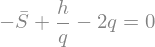

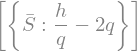

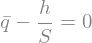

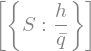

In [11]:
from sympy import *
from IPython.core.interactiveshell import InteractiveShell #print all elements, not only last one
InteractiveShell.ast_node_interactivity = "all"
init_printing(use_unicode=True)

%matplotlib inline
q, b, S, h, w, B, h0 = symbols('q, b, S, h, w, bbar, h0') # p : probabilité d'arrestation et de condamnation, b : bénéfice monétaire après avoir accompli le crime, S : sanction ou amende, h : préjudice, w : richesse de la victime
EU1 = symbols('EU1', cls=Function)(q,b,S) # utilité attendue pour le délinquant
EU2 = symbols ('EU2', cls=Function)(q,h,w) # Utilité attendue pour la victime
f = symbols ('f', cls = Function)(b) # fonction de densité de b
C = symbols ('C', cls = Function)(q) # coût de l'appréhension et de la condamnation
dF = symbols ('dF', cls = Function)(b)  # fonction cumulative ou fonction de répartition


b0 = q*S
f = 1/b # densité uniforme
funct = (b-h)*f  # Fonction de bien-être social
welfare = integrate(funct, (b, (b0, B))) - q**2
welfare
# Find optimal values of q and S
derive_q = Eq(welfare.diff(q))
q_star = solve(derive_q, 0)[0]


derive_s = Eq(welfare.diff(S))
S_star = solve(derive_s, 0)[0]

# optimum

q0 = symbols ('qbar', real = True)
S0 = symbols ('Sbar', real = True)

derive_q.subs(S, S0)
solve(derive_q.subs(S, S0))

equa_S = Eq(S_star.subs(q,q0),0)
equa_S

S_opt = equa_S.subs(q, q0)
solve(S_opt)

# fonction de densité exp\(\-b\)



/usr/local/lib/python3.8/dist-packages/sympy/core/relational.py:486: SymPyDeprecationWarning: 

Eq(expr) with rhs default to 0 has been deprecated since SymPy 1.5.
Use Eq(expr, 0) instead. See
https://github.com/sympy/sympy/issues/16587 for more info.

  SymPyDeprecationWarning(


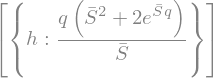

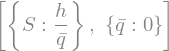

In [12]:
from sympy import *
from IPython.core.interactiveshell import InteractiveShell #print all elements, not only last one
InteractiveShell.ast_node_interactivity = "all"
init_printing(use_unicode=True)


%matplotlib inline
q, b, S, h, w, B, h0 = symbols('q, b, S, h, w, bbar, h0') # p : probabilité d'arrestation et de condamnation, b : bénéfice monétaire après avoir accompli le crime, S : sanction ou amende, h : préjudice, w : richesse de la victime
EU1 = symbols('EU1', cls=Function)(q,b,S) # utilité attendue pour le délinquant
EU2 = symbols ('EU2', cls=Function)(q,h,w) # Utilité attendue pour la victime
#f = symbols ('f', cls = Function)(b) # fonction de densité de b
C = symbols ('C', cls = Function)(q) # coût de l'appréhension et de la condamnation
dF = symbols ('dF', cls = Function)(b)  # fonction cumulative ou fonction de répartition


b0 = q*S
f = exp(-b) # densité uniforme
funct = (b-h)*f  # Fonction de bien-être social
welfare = integrate(funct, (b, (b0, B))) - q**2
welfare
# Find optimal values of q and S
derive_q = Eq(welfare.diff(q))
q_star = solve(derive_q, 0)[0]


derive_s = Eq(welfare.diff(S))
S_star = solve(derive_s, 0)[0]

# optimum

q0 = symbols ('qbar', real = True)
S0 = symbols ('Sbar', real = True)

derive_q.subs(S, S0)
solve(derive_q.subs(S, S0))

equa_S = Eq(S_star.subs(q,q0),0)
equa_S

S_opt = equa_S.subs(q, q0)
solve(S_opt)